# E-commerce Data Exploration with Python

In [1]:
# data manipulation, plotting, and numerical computing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# json
import json

# working with Google Drive
from google.colab import drive
drive.mount('/content/drive/')
import os
os.chdir("drive/My Drive/Colab Notebooks/E-comm/data")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Mounted at /content/drive/


# Importing and Understanding Datasets

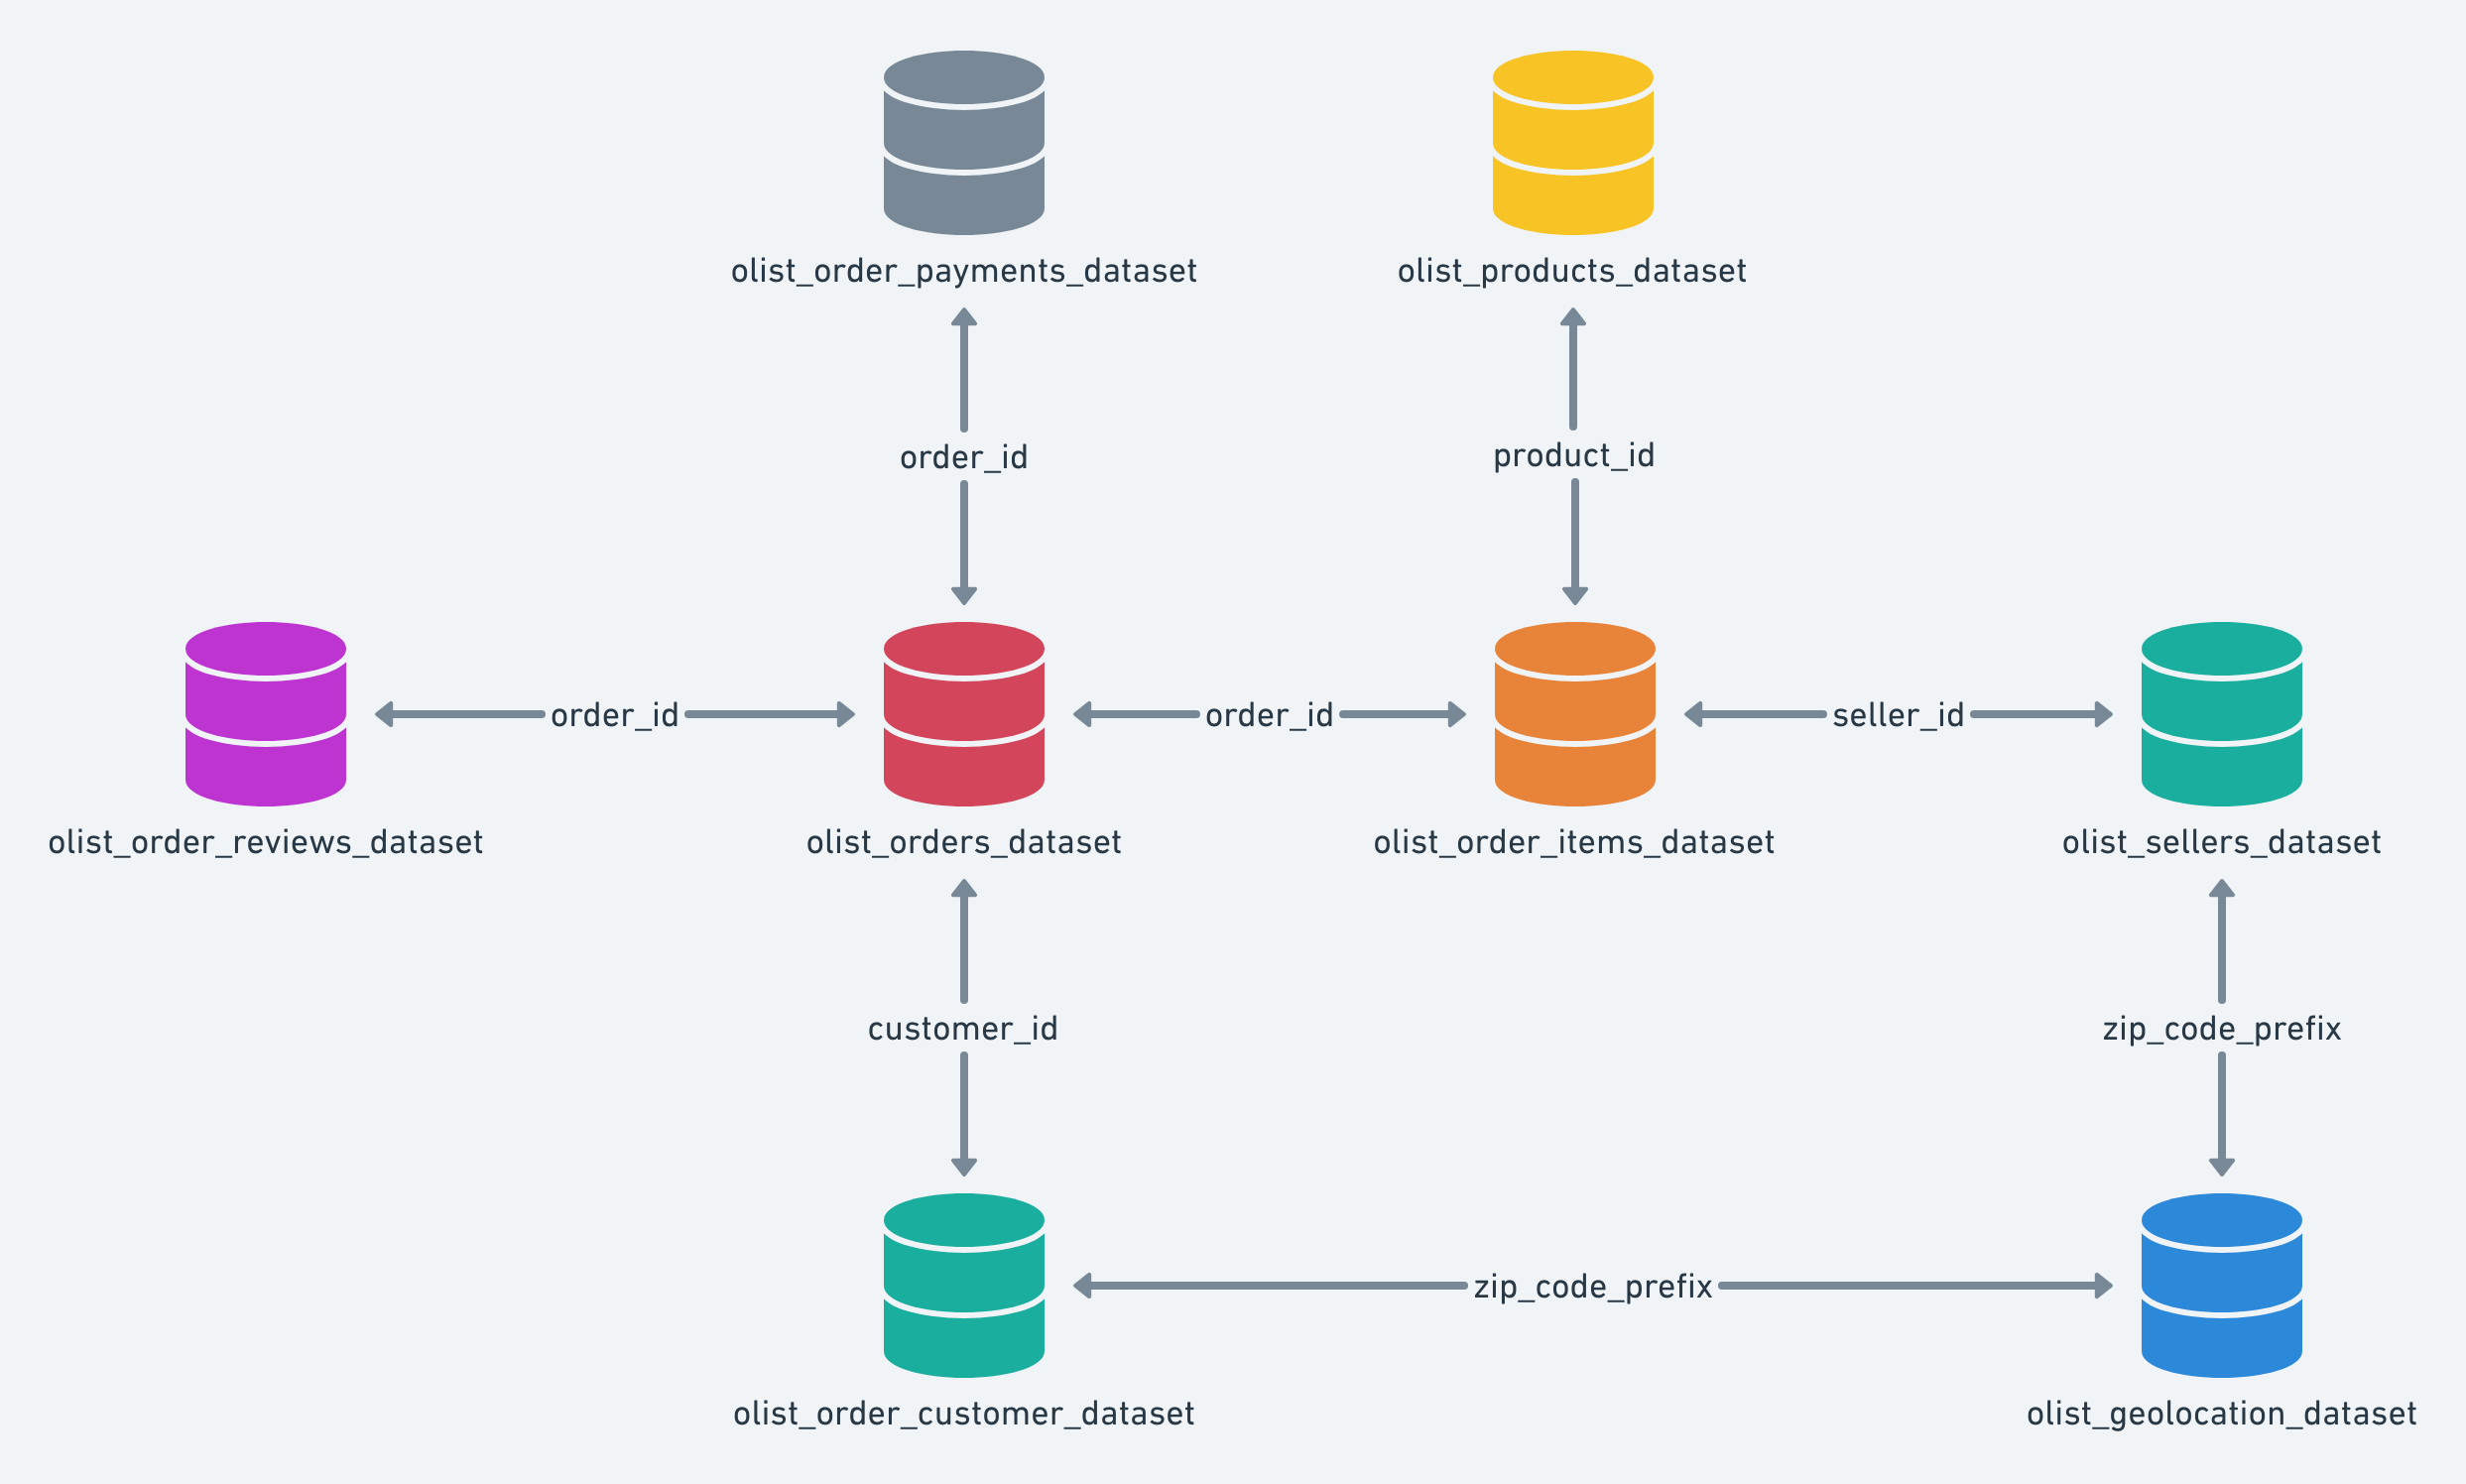

## Exploring variables on Dataset

In [2]:
# uploading data from Google Drive

# Get a dict of all files in the directory
file_list = os.listdir()
datasets = {file.split("_")[1]: file for file in file_list if file.endswith(".csv")}

# Print the dict of datasets
print("datasets: {}".format(json.dumps(datasets, indent=4)))

# Iterate through the dict and import each CSV using pandas
for key, value in datasets.items():
    df = pd.read_csv(value)
    var_name = "df_{}".format(key)
    globals()[var_name] = df

    columns = list(df.columns)
    column_types = list(df.dtypes.apply(lambda x: str(x)))

    output = 'Columns:\n'
    for col, col_type in zip(columns, column_types):
      output += f'{col} - {col_type}\n'

    print("{}\n{}".format(var_name, output))

datasets: {
    "customers": "olist_customers_dataset.csv",
    "geolocation": "olist_geolocation_dataset.csv",
    "orders": "olist_orders_dataset.csv",
    "products": "olist_products_dataset.csv",
    "sellers": "olist_sellers_dataset.csv",
    "category": "product_category_name_translation.csv",
    "reviews": "olist_reviews_dataset.csv",
    "payments": "olist_payments_dataset.csv",
    "orderitems": "olist_orderitems_dataset.csv"
}
df_customers
Columns:
customer_id - object
customer_unique_id - object
customer_zip_code_prefix - int64
customer_city - object
customer_state - object

df_geolocation
Columns:
geolocation_zip_code_prefix - int64
geolocation_lat - float64
geolocation_lng - float64
geolocation_city - object
geolocation_state - object

df_orders
Columns:
order_id - object
customer_id - object
order_status - object
order_purchase_timestamp - object
order_approved_at - object
order_delivered_carrier_date - object
order_delivered_customer_date - object
order_estimated_delive

# **Time-based** analysis

The time-based analysis block is a set of questions that focus on how different variables related to Olist's sales change over time. These variables include the number of items per order, the payment method used, the customer reviews, the number of orders placed, and the variety of products offered.

To answer these questions, we use most of the datasets, including:

- olist_customers_dataset.csv, 
- olist_geolocation_dataset.csv, 
- olist_order_items_dataset.csv, 
- olist_order_payments_dataset.csv, 
- olist_order_reviews_dataset.csv, 
- olist_orders_dataset.csv, 
- olist_products_dataset.csv, 
- olist_sellers_dataset.csv.

With this analysis, we can have a better understanding of how the variables are changing over time, which can help in identifying trends, patterns and making predictions for the future.

In [3]:
# Merge the necessary datasets to have all the data in one dataframe
merged_df = df_orders.merge(df_orderitems, on='order_id') \
                 .merge(df_payments, on='order_id') \
                 .merge(df_reviews, on='order_id') \
                 .merge(df_products, on='product_id') \
                 .merge(df_sellers, on='seller_id') \
                 .merge(df_customers, on='customer_id')

# Extract the necessary columns for the analysis
time_based_df = merged_df[['order_id','customer_unique_id','order_status','order_purchase_timestamp', 'product_id', 'seller_id','price', 'freight_value','payment_type','review_score','product_category_name']]

# Convert the timestamp column to datetime format
time_based_df['order_purchase_timestamp'] = pd.to_datetime(time_based_df['order_purchase_timestamp'])

time_based_df['month'] = time_based_df['order_purchase_timestamp'].dt.month
time_based_df['year'] = time_based_df['order_purchase_timestamp'].dt.year

# Filtering 2017 and 2018 data
time_based_df = time_based_df[time_based_df['order_purchase_timestamp'] <= '2018-08-31']
time_based_df = time_based_df[time_based_df['order_purchase_timestamp'] >= '2017-01-01']

time_based_df.head()

,order_id,customer_unique_id,order_status,order_purchase_timestamp,product_id,seller_id,price,freight_value,payment_type,review_score,product_category_name,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,credit_card,4,utilidades_domesticas,10,2017
1,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,4,utilidades_domesticas,10,2017
2,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,delivered,2017-10-02 10:56:33,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,voucher,4,utilidades_domesticas,10,2017
3,128e10d95713541c87cd1a2e48201934,3a51803cc0d012c3b5dc8b7528cb05f7,delivered,2017-08-15 18:29:31,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,credit_card,4,utilidades_domesticas,8,2017
4,0e7e841ddf8f8f2de2bad69267ecfbcf,ef0996a1a279c26e7ecbd737be23d235,delivered,2017-08-02 18:24:47,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,credit_card,5,utilidades_domesticas,8,2017


In [4]:
# Describing the dataset vars

pd.options.display.max_columns = None
time_based_df.describe(include="all")

,order_id,customer_unique_id,order_status,order_purchase_timestamp,product_id,seller_id,price,freight_value,payment_type,review_score,product_category_name,month,year
count,116945,116945,116945,116945,116945,116945,116945.000000,116945.000000,116945,116945.000000,115252,116945.000000,116945.000000
unique,97609,94427,6,97063,32627,3063,NaN,NaN,4,NaN,73,NaN,NaN
top,895ab968e7bb0d5659d16cd74cd1650c,9a736b248f67d166d2fbb006bcb877c3,delivered,2017-08-08 20:26:31,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,credit_card,NaN,cama_mesa_banho,NaN,NaN
freq,63,75,114528,63,533,2128,NaN,NaN,86229,NaN,11839,NaN,NaN
first,NaN,NaN,NaN,2017-01-05 11:56:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2018-08-29 15:00:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,120.487755,20.028227,NaN,4.032870,NaN,6.014169,2017.542623
std,NaN,NaN,NaN,NaN,NaN,NaN,182.961016,15.833603,NaN,1.386693,NaN,3.227098,0.498182
min,NaN,NaN,NaN,NaN,NaN,NaN,0.850000,0.000000,NaN,1.000000,NaN,1.000000,2017.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,39.900000,13.080000,NaN,4.000000,NaN,3.000000,2017.000000


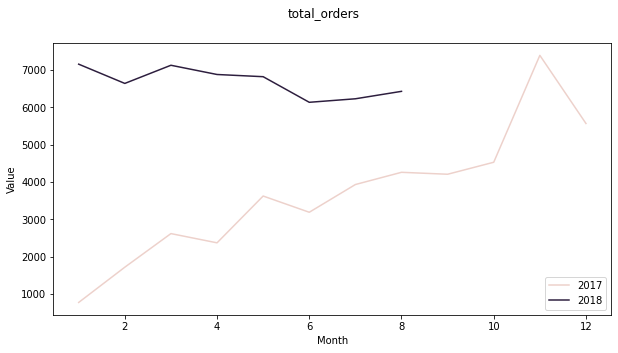

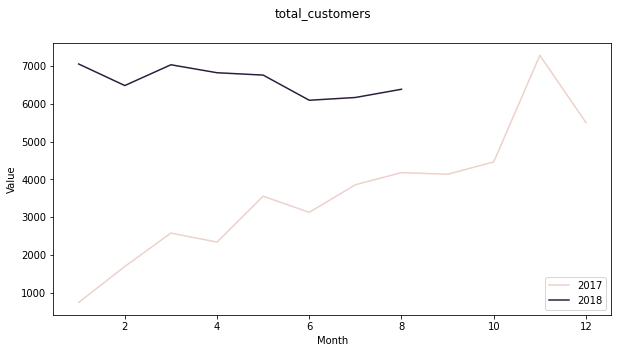

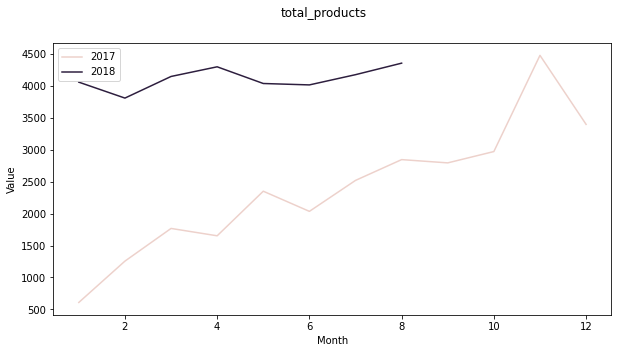

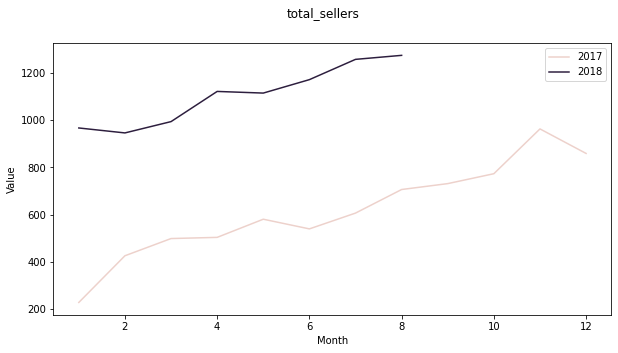

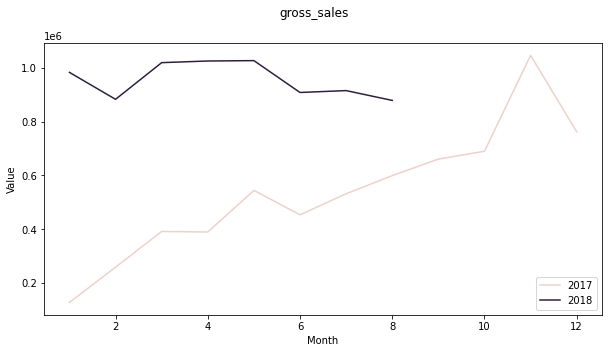

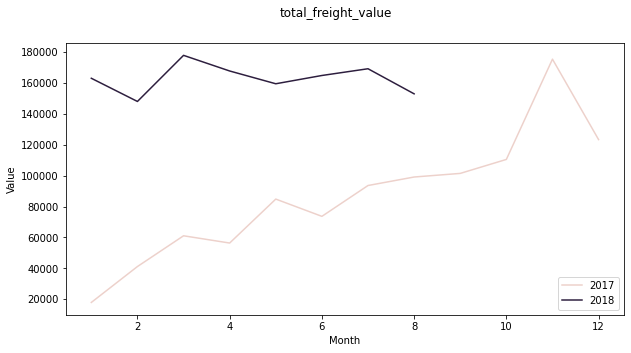

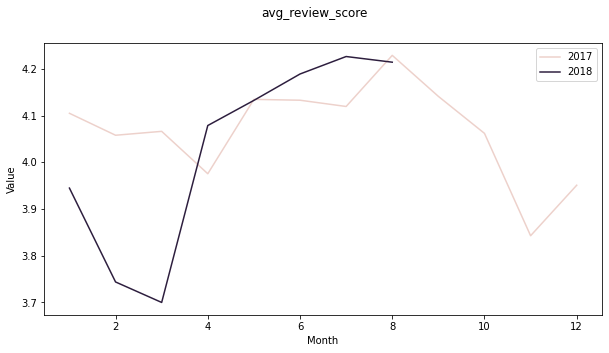

In [5]:
# Group the data by month_year
grouped_df = time_based_df.groupby(['year','month']).agg({'order_id': 'nunique', 
                                                      'customer_unique_id': 'nunique', 
                                                      'product_id': 'nunique',
                                                      'seller_id': 'nunique',
                                                      'price': 'sum',
                                                      'freight_value': 'sum',
                                                      'review_score': 'mean'}).reset_index()

# Rename the columns for better understanding
grouped_df.columns = ['year','month', 'total_orders', 'total_customers', 'total_products', 'total_sellers', 'gross_sales','total_freight_value','avg_review_score']

# Plot the data
columns = ['total_orders', 'total_customers', 'total_products', 'total_sellers', 'gross_sales','total_freight_value','avg_review_score']

for data in columns:
  plt.figure(figsize=(10,5))
  
  sns.lineplot(x='month',y=data ,hue='year',data=grouped_df)
  plt.suptitle(data)

  plt.legend()
  plt.xlabel('Month')
  plt.ylabel('Value')
  plt.show()

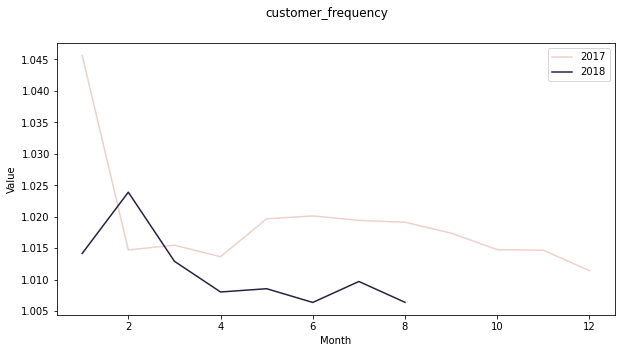

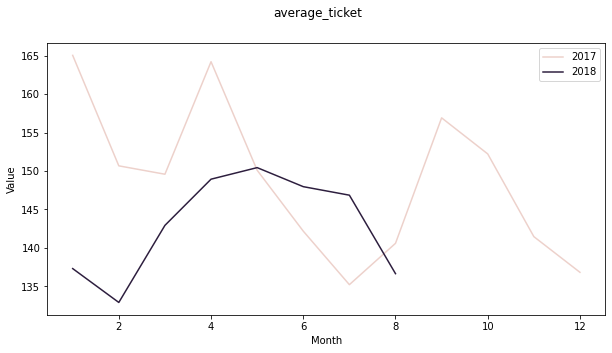

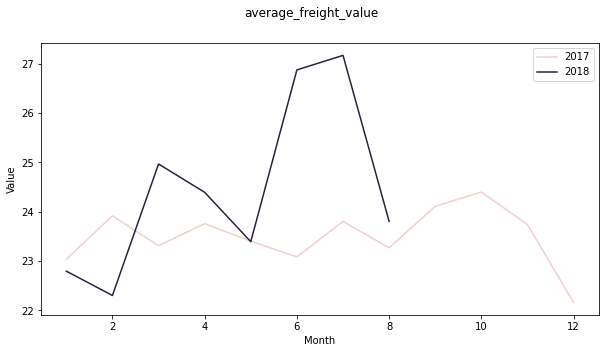

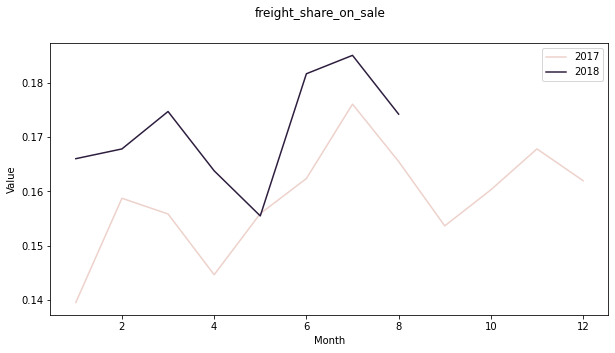

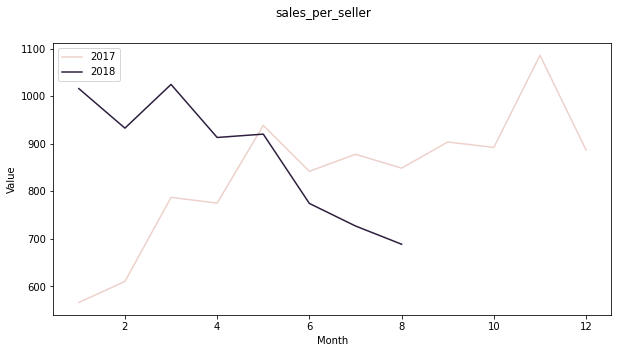

In [6]:
# Adding calculated Variables
grouped_df['customer_frequency'] = grouped_df['total_orders'] / grouped_df['total_customers']
grouped_df['average_ticket'] = grouped_df['gross_sales'] / grouped_df['total_orders']
grouped_df['average_freight_value'] = grouped_df['total_freight_value'] / grouped_df['total_orders']
grouped_df['freight_share_on_sale'] = grouped_df['total_freight_value'] / grouped_df['gross_sales']
grouped_df['sales_per_seller'] = grouped_df['gross_sales'] / grouped_df['total_sellers']

new_columns = ['customer_frequency','average_ticket','average_freight_value','freight_share_on_sale','sales_per_seller']

for data in new_columns:
  plt.figure(figsize=(10,5))
  
  sns.lineplot(x='month',y=data ,hue='year',data=grouped_df)
  plt.suptitle(data)

  plt.legend()
  plt.xlabel('Month')
  plt.ylabel('Value')
  plt.show()

**Insights:**

The time-based analysis of the Olist dataset shows some interesting insights about the company's performance over time.

- Firstly, it is clear that the number of orders, unique customers, and distinct products sold by Olist all increased significantly in 2017, but remained relatively flat throughout 2018. On the other hand, the number of sellers continued to grow throughout the following year.

- Additionally, after a peak in gross sales during the 2017 Black Friday period, sales have been steadily declining in the following year. This suggests that Olist may need to re-evaluate its sales strategy.

- Furthermore, the data shows that the Olist customer retention rate is very close to 1, indicating that only a small number of customers are repeat buyers. This highlights a need for the company to focus on customer acquisition and retention.

- It is worth noting that the average ticket price for Olist products has remained relatively stable over time, around 150 reais. However, the average freight value paid by customers has fluctuated between 10% and 20% of the product value.

- Finally, the data reveals that the sales per seller have grown significantly in 2017, but also fell in the following year. This suggests that Olist may need to re-evaluate its seller recruitment and retention strategy.